In [1]:
import wfdb
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np

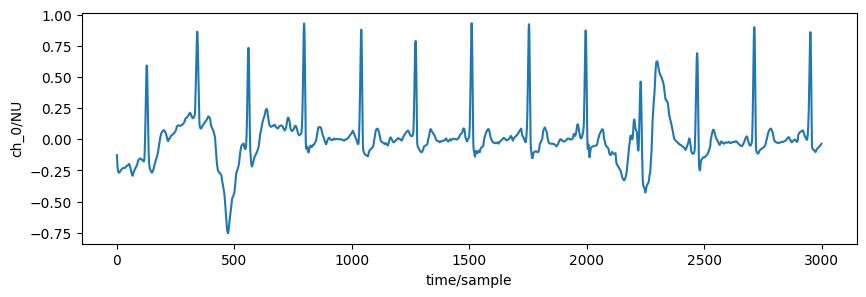

In [2]:
df = pd.read_csv('../dataset/REFERENCE-v3.csv', names=['filename', 'label'], header=None)
filename = df.loc[0, 'filename']
r = wfdb.rdrecord(f'../dataset/training2017/{filename}')
s = r.p_signal[:3000,0]
wfdb.plot_items(signal=s,
                figsize=(10, 3),)

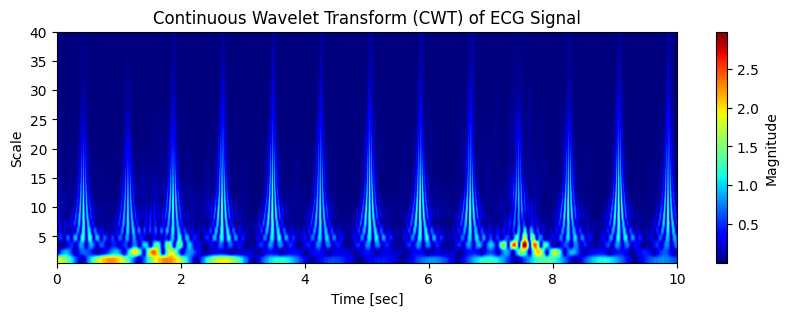

In [3]:
signal_freq = 300
freqs = np.linspace(40, 0.5, 32)
norm_freqs = freqs / signal_freq
scales = pywt.frequency2scale("morl", norm_freqs)

coefs, _ = pywt.cwt(s, scales=scales, wavelet="morl", sampling_period=1.0 / signal_freq)

plt.figure(figsize=(10, 3))
plt.imshow(
    np.abs(coefs),
    extent=[0, len(s) / signal_freq, freqs.min(), freqs.max()],
    aspect="auto",
    cmap="jet",
)
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time [sec]")
plt.title("Continuous Wavelet Transform (CWT) of ECG Signal")
plt.show()